In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/breast-cancer-dataset/Breast_cancer_dataset.csv


In [2]:
df=pd.read_csv('/kaggle/input/breast-cancer-dataset/Breast_cancer_dataset.csv')
df.head()


/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pan

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
df = df.drop(columns=['Unnamed: 32'])
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
df.shape

(569, 32)

In [6]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [7]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [8]:
df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [9]:
df.duplicated().sum()

0

In [10]:
df['diagnosis'].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

**Visualization**

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

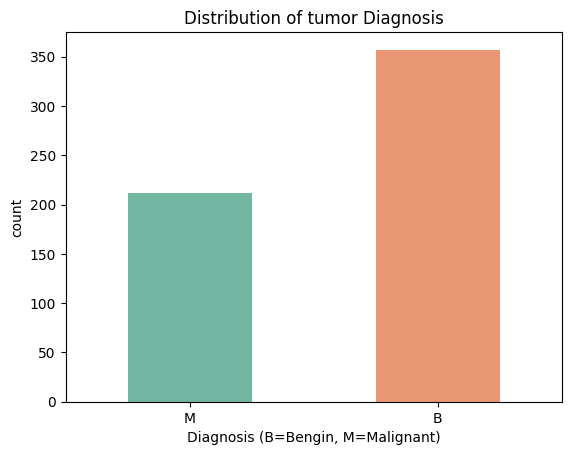

In [12]:
sns.countplot(x='diagnosis',data=df,palette='Set2',width=0.5)
plt.title('Distribution of tumor Diagnosis')
plt.xlabel('Diagnosis (B=Bengin, M=Malignant)')
plt.ylabel('count')
plt.show()

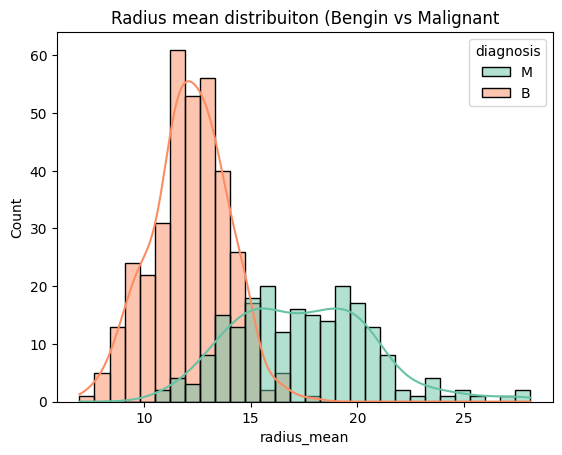

In [13]:
import warnings;
warnings.filterwarnings('ignore',category=FutureWarning)
sns.histplot(data=df,x='radius_mean',hue='diagnosis',bins=30,palette='Set2',kde=True)
plt.title('Radius mean distribuiton (Bengin vs Malignant')
plt.show()

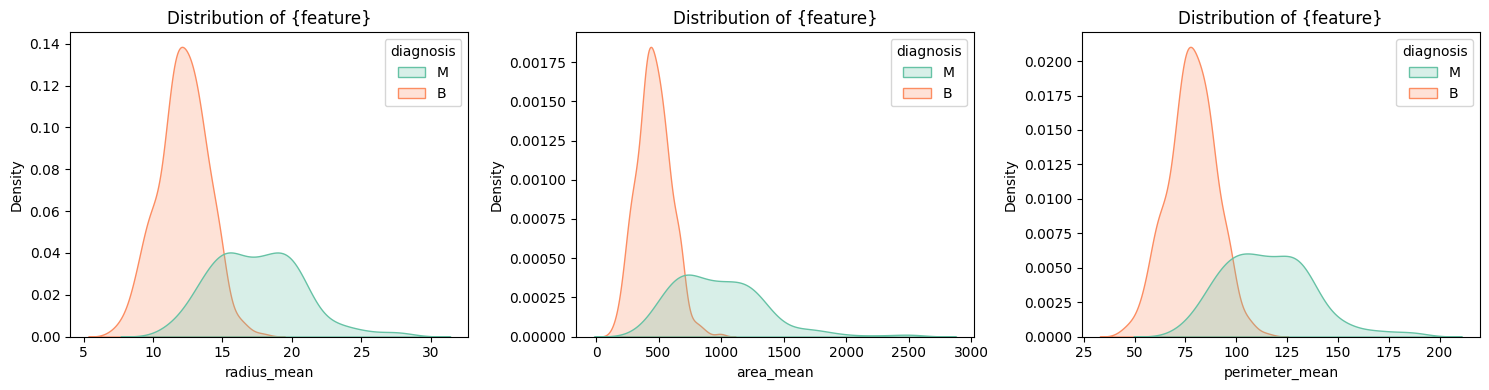

In [14]:
features = ['radius_mean', 'area_mean', 'perimeter_mean']

#plot distribuiton 
plt.figure(figsize=(15,4))

for i ,feature in enumerate(features):
    plt.subplot(1,3,i+1)    #1 row , 3 columns, current plot 
    sns.kdeplot(data=df,x=feature,hue='diagnosis',fill=True,palette='Set2')
    plt.title('Distribution of {feature}')

plt.tight_layout()
plt.show()

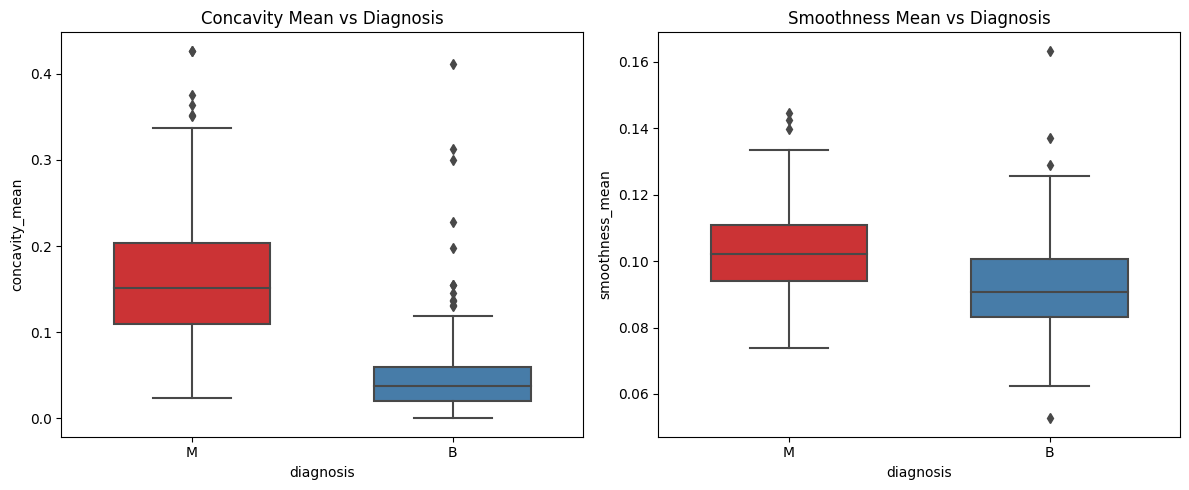

In [15]:
plt.figure(figsize=(12,5))

#concavity Mean 
plt.subplot(1,2,1)
sns.boxplot(x='diagnosis',y='concavity_mean',data=df,palette='Set1',width=0.6)
plt.title('Concavity Mean vs Diagnosis')

#smoothness Mean 
plt.subplot(1,2,2)
sns.boxplot(x='diagnosis',y='smoothness_mean',data=df,palette='Set1',width=0.6)
plt.title('Smoothness Mean vs Diagnosis')

plt.tight_layout()
plt.show()

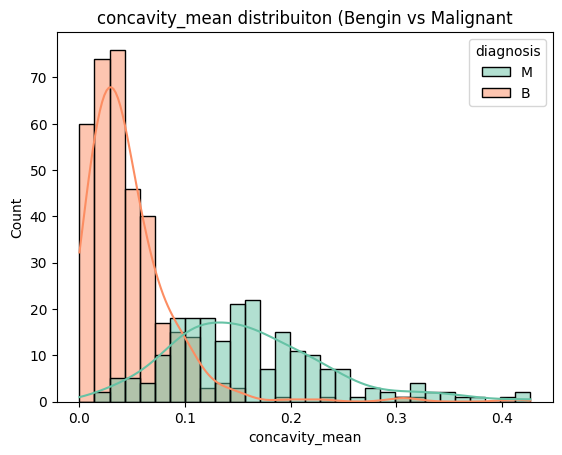

In [16]:
import warnings;
warnings.filterwarnings('ignore',category=FutureWarning)
sns.histplot(data=df,x='concavity_mean',hue='diagnosis',bins=30,palette='Set2',kde=True)
plt.title('concavity_mean distribuiton (Bengin vs Malignant')
plt.show()

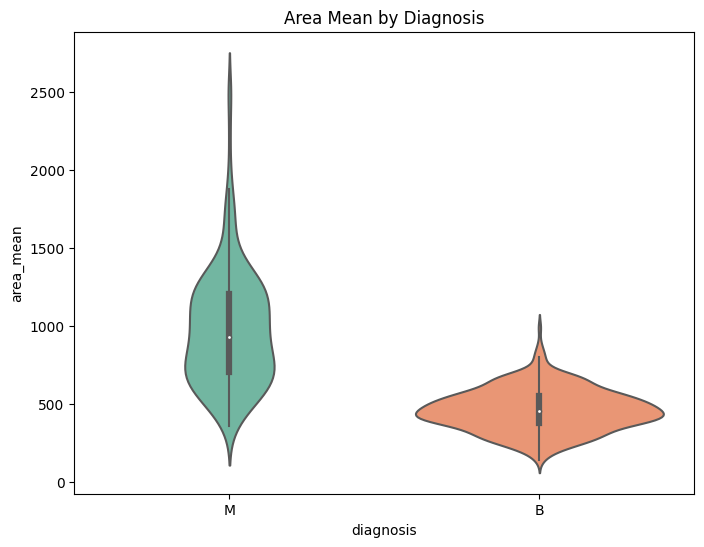

In [17]:
plt.figure(figsize=(8,6))

sns.violinplot(x='diagnosis',y='area_mean',data=df,palette='Set2')
plt.title('Area Mean by Diagnosis')
plt.show()

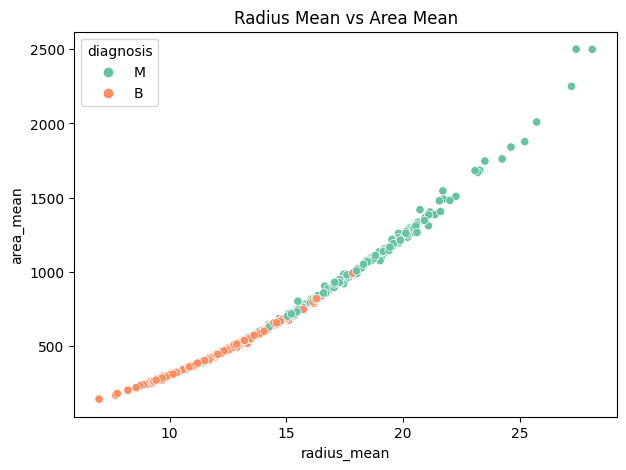

In [18]:
plt.figure(figsize=(7,5))
sns.scatterplot(x='radius_mean',y='area_mean',hue='diagnosis',data=df,palette='Set2')
plt.title('Radius Mean vs Area Mean')
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


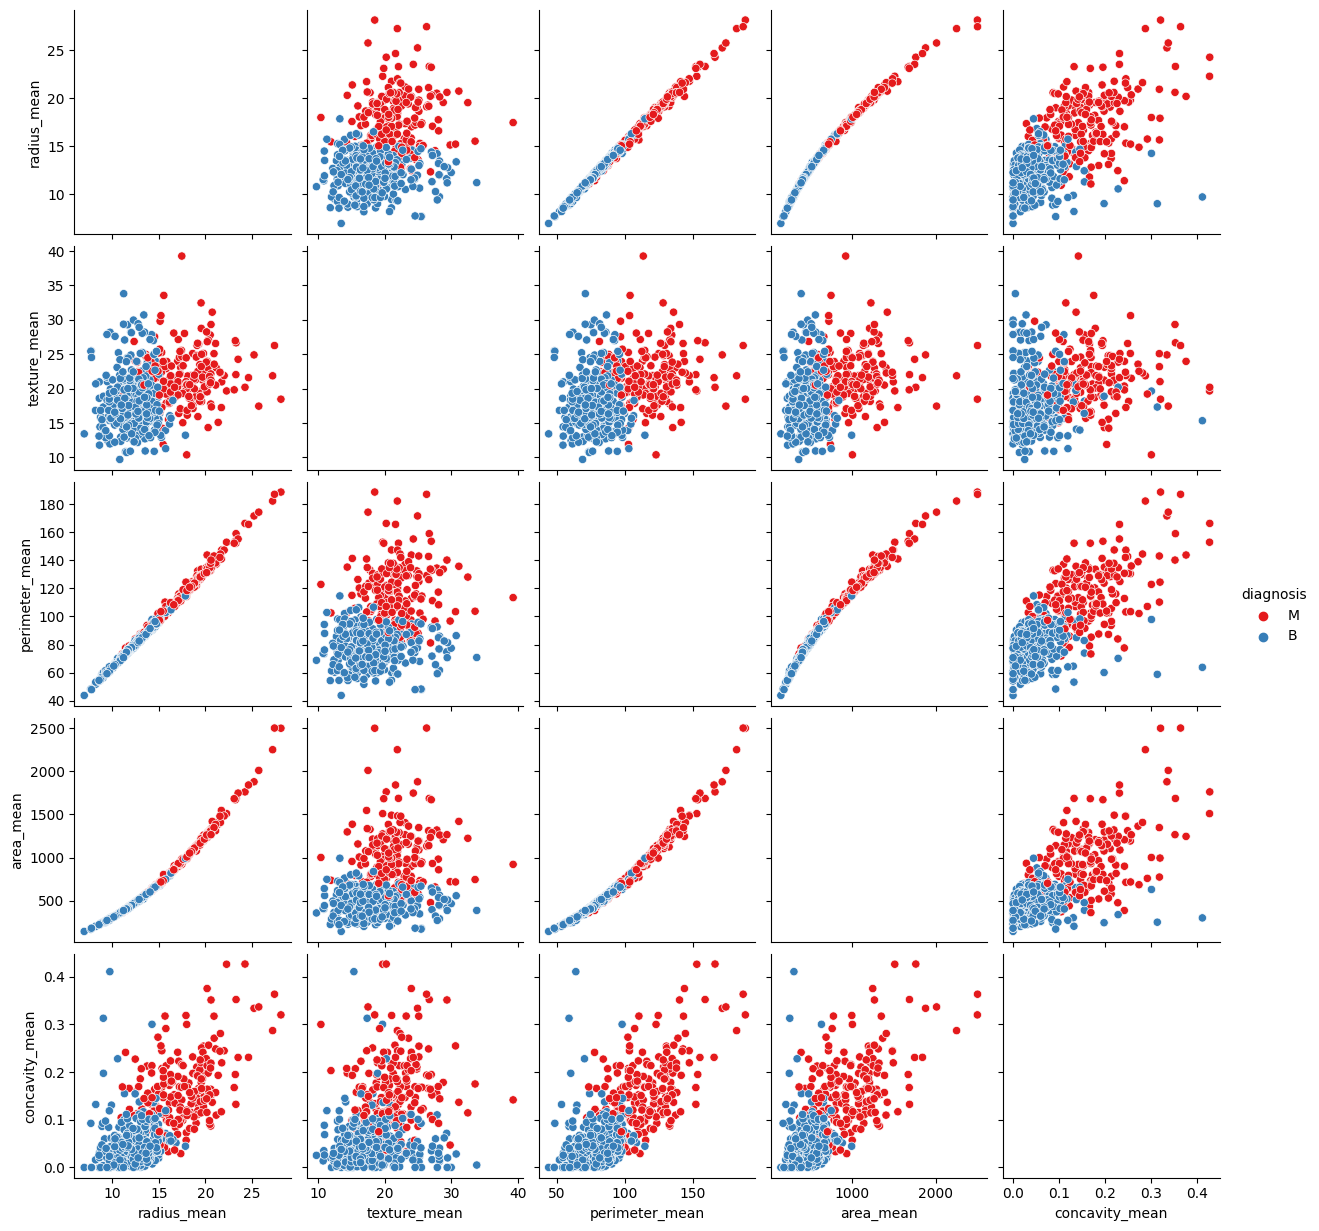

In [19]:
import warnings;
warnings.filterwarnings('ignore',category=FutureWarning)
features=['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'concavity_mean']
sns.pairplot(df[features+['diagnosis']],hue='diagnosis',palette='Set1',diag_kind=True)
plt.show()

In [20]:
# encode diagnosis 
df['diagnosis']=df['diagnosis'].map({'M':1,'B':0})   #1 = Malignant 
                                                     #0 = Benign
df['diagnosis'].value_counts()

diagnosis
0    357
1    212
Name: count, dtype: int64

In [21]:
df=df.drop(columns=['id'])
df.head(1)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.8,1001.0,0.1184,0.2776,0.3001,0.1471,0.2419,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189


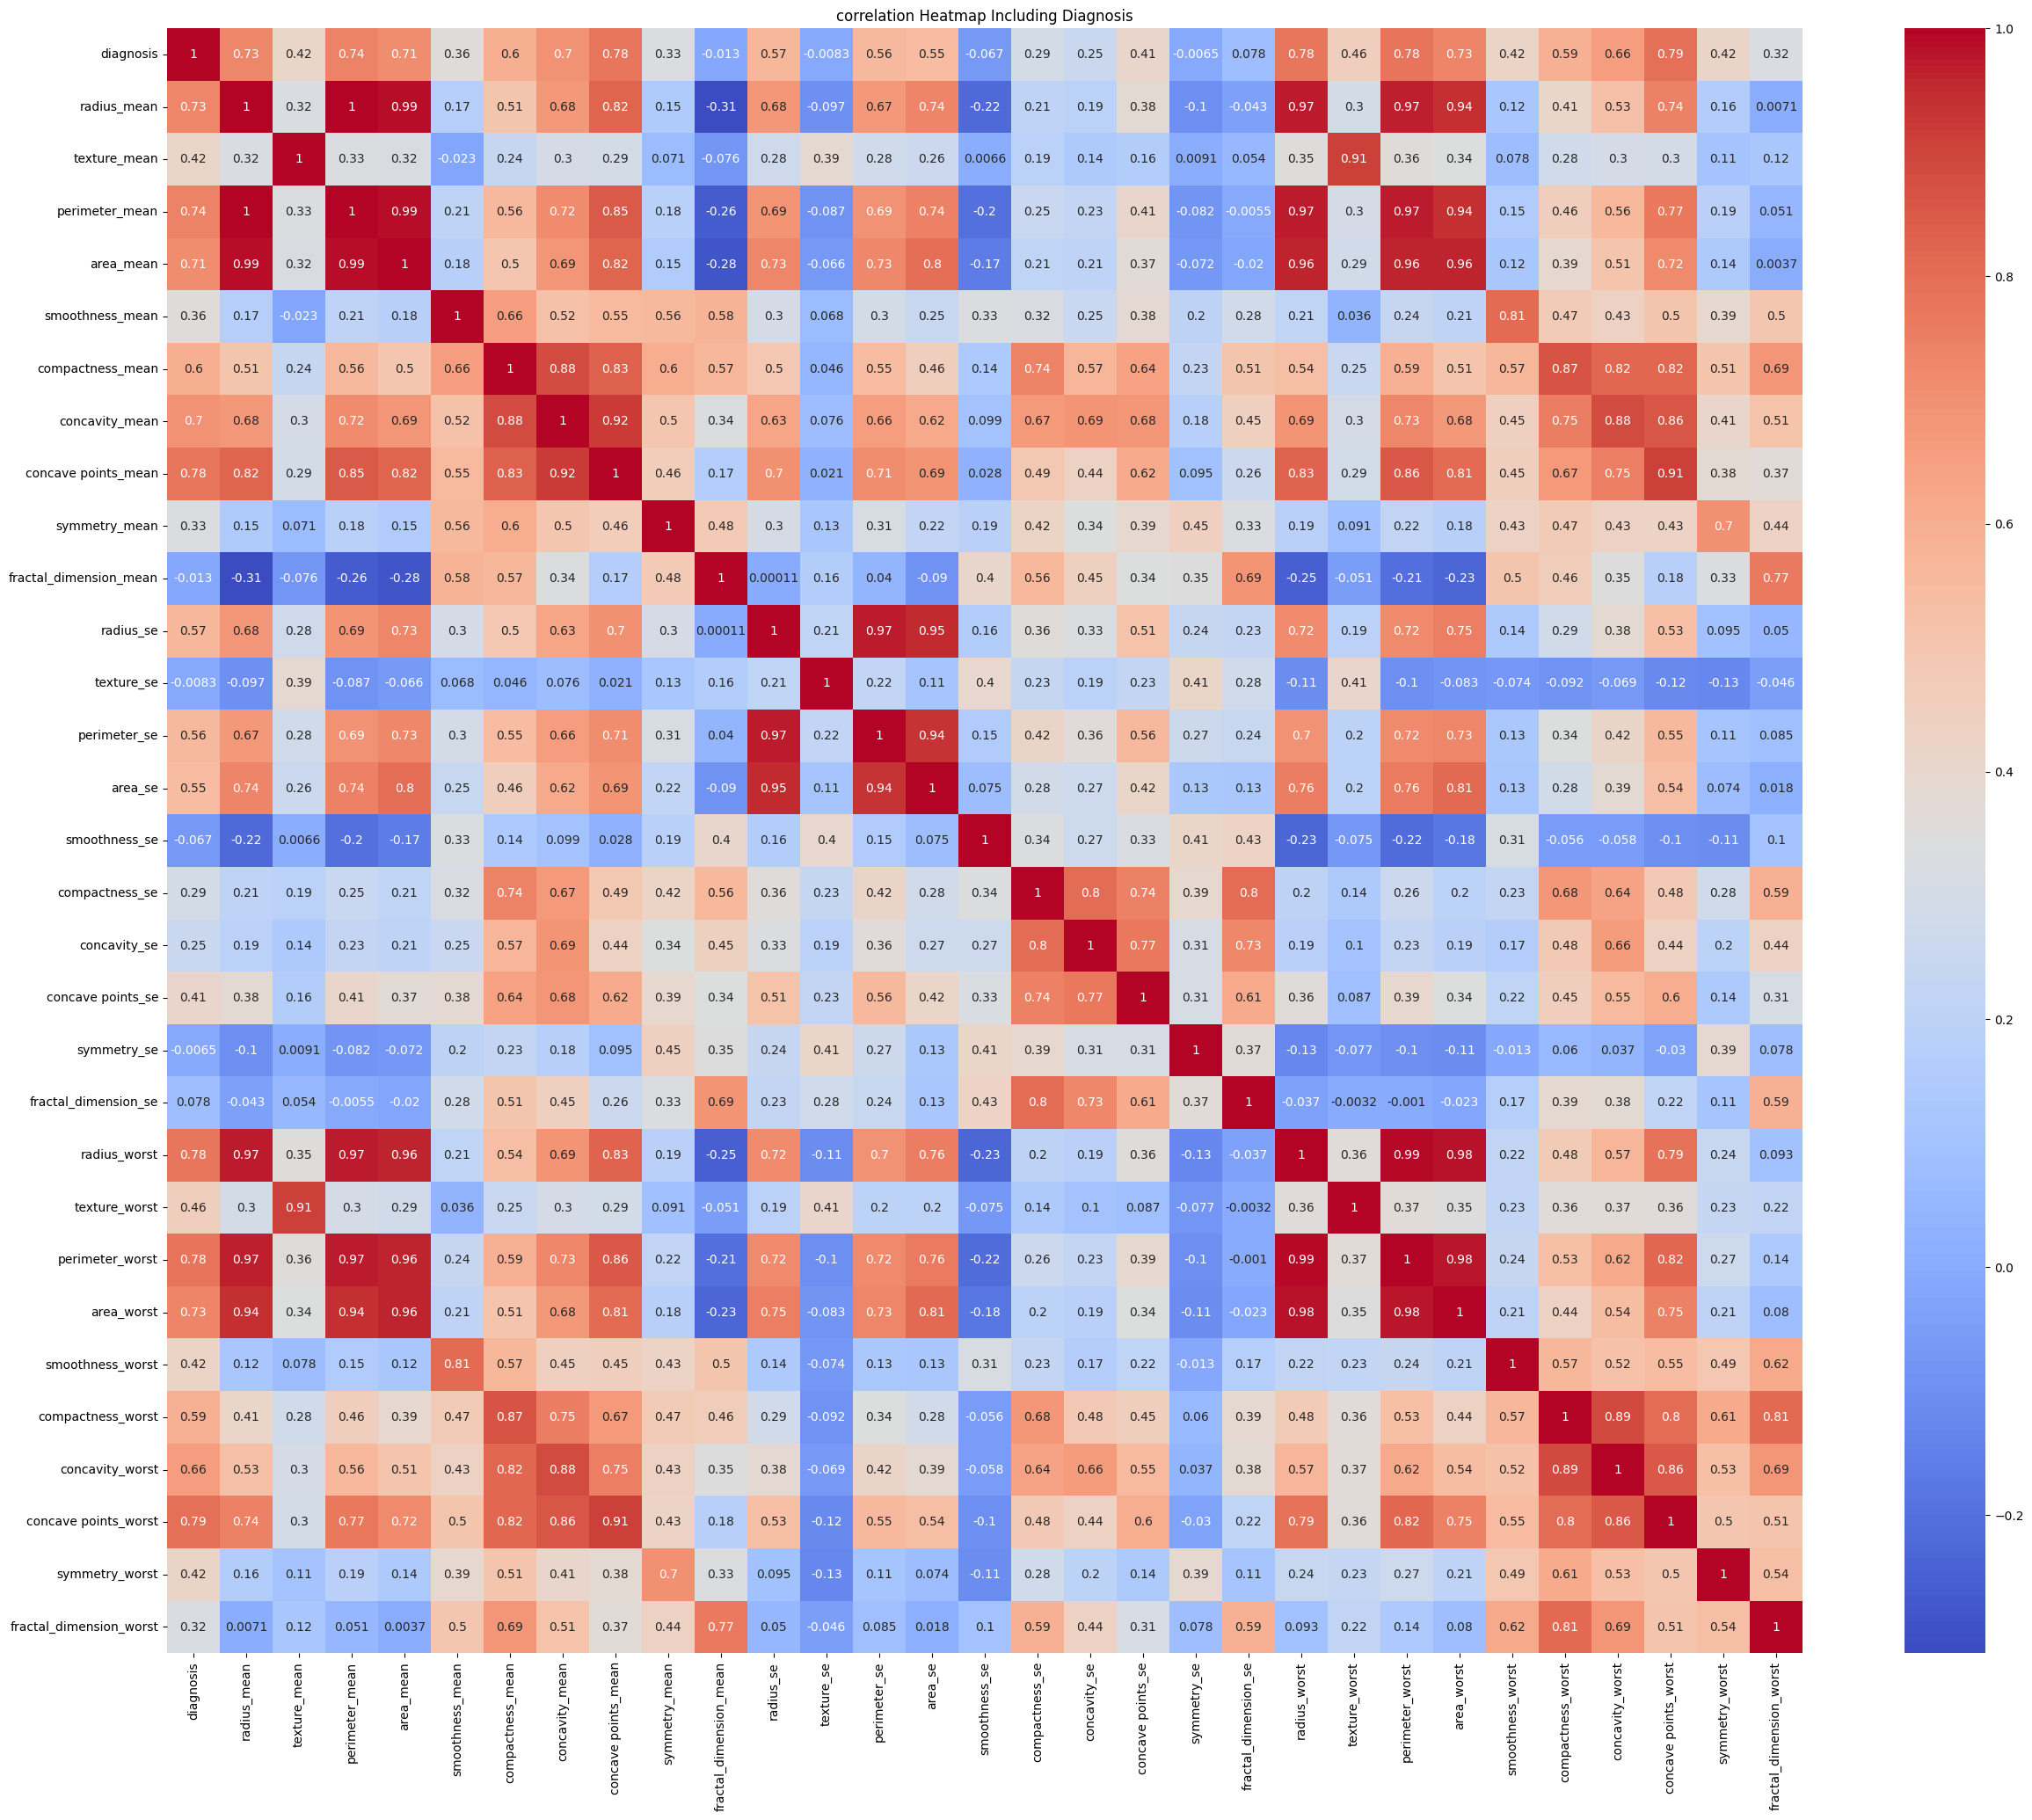

In [22]:
plt.figure(figsize=(30,24))
sns.heatmap(df.corr(),cmap='coolwarm',annot=True)
plt.title('correlation Heatmap Including Diagnosis')
plt.show()

**Separate data**

In [23]:
x=df.drop(columns=['diagnosis'])
y=df['diagnosis']

In [24]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [25]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((455, 30), (114, 30), (455,), (114,))

**Feature scaling**

In [26]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.fit_transform(x_test)

**Build Model**

In [27]:
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression(penalty='l2',C=0.5)
log_reg.fit(x_train_scaled,y_train)

LogisticRegression(C=0.5)

In [28]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

y_test_pred=log_reg.predict(x_test_scaled)
y_train_pred=log_reg.predict(x_train_scaled)

print('accuracy:',accuracy_score(y_test,y_test_pred))
print('accuracy:',accuracy_score(y_train,y_train_pred))

print('classification report:',classification_report(y_test,y_test_pred))
print('classificaiton report:',classification_report(y_train,y_train_pred))

accuracy: 0.9824561403508771
accuracy: 0.9868131868131869
classification report:               precision    recall  f1-score   support

           0       0.97      1.00      0.99        71
           1       1.00      0.95      0.98        43

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

classificaiton report:               precision    recall  f1-score   support

           0       0.99      0.99      0.99       286
           1       0.99      0.98      0.98       169

    accuracy                           0.99       455
   macro avg       0.99      0.98      0.99       455
weighted avg       0.99      0.99      0.99       455



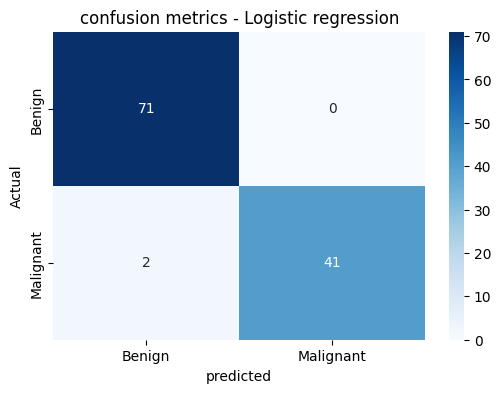

In [29]:
cm=confusion_matrix(y_test,y_test_pred)

#plot confusion matrix 
plt.figure(figsize=(6,4))
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues',xticklabels=['Benign', 'Malignant'],yticklabels=['Benign', 'Malignant'])
plt.xlabel('predicted')
plt.ylabel('Actual')
plt.title('confusion metrics - Logistic regression')
plt.show()

**Use_SVM model**

In [30]:
from sklearn.svm import SVC
svc=SVC(kernel='rbf',C=11,gamma=0.01,probability=True)
svc.fit(x_train_scaled,y_train)

SVC(C=11, gamma=0.01, probability=True)

In [31]:
y_test_pred=svc.predict(x_test_scaled)
y_train_pred=svc.predict(x_train_scaled)

print('accuracy:',accuracy_score(y_test,y_test_pred))
print('accuracy:',accuracy_score(y_train,y_train_pred))

print('classification report:',classification_report(y_test,y_test_pred))
print('classificaiton report:',classification_report(y_train,y_train_pred))

accuracy: 0.9824561403508771
accuracy: 0.989010989010989
classification report:               precision    recall  f1-score   support

           0       0.97      1.00      0.99        71
           1       1.00      0.95      0.98        43

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

classificaiton report:               precision    recall  f1-score   support

           0       0.99      1.00      0.99       286
           1       0.99      0.98      0.99       169

    accuracy                           0.99       455
   macro avg       0.99      0.99      0.99       455
weighted avg       0.99      0.99      0.99       455



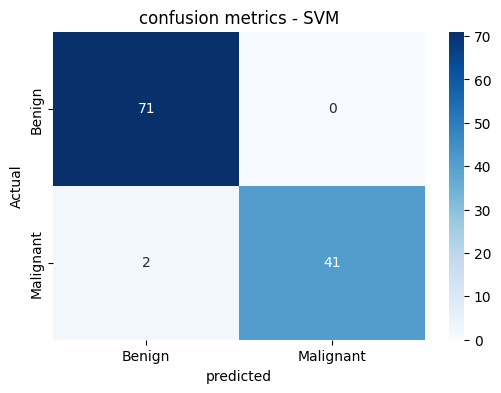

In [32]:
cm=confusion_matrix(y_test,y_test_pred)

#plot confusion matrix 
plt.figure(figsize=(6,4))
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues',xticklabels=['Benign', 'Malignant'],yticklabels=['Benign', 'Malignant'])
plt.xlabel('predicted')
plt.ylabel('Actual')
plt.title('confusion metrics - SVM')
plt.show()

**USE-KNN MODEL**

In [33]:
from sklearn.neighbors import KNeighborsClassifier

#create model 
knn=KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2, leaf_size=20)
knn.fit(x_train_scaled,y_train)

KNeighborsClassifier(leaf_size=20)

In [34]:
y_test_pred=knn.predict(x_test_scaled)
y_train_pred=knn.predict(x_train_scaled)

print('accuracy:',accuracy_score(y_test,y_test_pred))
print('accuracy:',accuracy_score(y_train,y_train_pred))

print('classification report:',classification_report(y_test,y_test_pred))
print('classificaiton report:',classification_report(y_train,y_train_pred))

accuracy: 0.956140350877193
accuracy: 0.9802197802197802
classification report:               precision    recall  f1-score   support

           0       0.96      0.97      0.97        71
           1       0.95      0.93      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

classificaiton report:               precision    recall  f1-score   support

           0       0.97      1.00      0.98       286
           1       1.00      0.95      0.97       169

    accuracy                           0.98       455
   macro avg       0.98      0.97      0.98       455
weighted avg       0.98      0.98      0.98       455



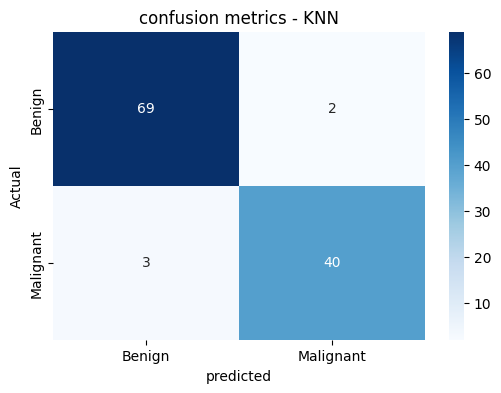

In [35]:
cm=confusion_matrix(y_test,y_test_pred)

#plot confusion matrix 
plt.figure(figsize=(6,4))
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues',xticklabels=['Benign', 'Malignant'],yticklabels=['Benign', 'Malignant'])
plt.xlabel('predicted')
plt.ylabel('Actual')
plt.title('confusion metrics - KNN')
plt.show()

**BUILD Random Forest**

In [36]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=100, random_state=42, max_depth=4,min_samples_split=10,min_samples_leaf=6)
rf.fit(x_train_scaled,y_train)

RandomForestClassifier(max_depth=4, min_samples_leaf=6, min_samples_split=10,
                       random_state=42)

In [37]:
y_test_pred=rf.predict(x_test_scaled)
y_train_pred=rf.predict(x_train_scaled)

print('accuracy:',accuracy_score(y_test,y_test_pred))
print('accuracy:',accuracy_score(y_train,y_train_pred))

print('classification report:',classification_report(y_test,y_test_pred))
print('classificaiton report:',classification_report(y_train,y_train_pred))

accuracy: 0.9649122807017544
accuracy: 0.9758241758241758
classification report:               precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114

classificaiton report:               precision    recall  f1-score   support

           0       0.98      0.99      0.98       286
           1       0.98      0.96      0.97       169

    accuracy                           0.98       455
   macro avg       0.98      0.97      0.97       455
weighted avg       0.98      0.98      0.98       455



In [38]:
from sklearn.model_selection import GridSearchCV

In [39]:
param_grid ={ 

   'n_estimators': [100, 200, 300],
    'criterion': ['gini', 'entropy'],
    'max_depth': [4, 6, 8, 10,None],
    'min_samples_split': [2, 4, 6,10],
    'min_samples_leaf': [1, 2, 4,6]


}
rf_grid=GridSearchCV(RandomForestClassifier(random_state=42),param_grid,cv=5,scoring='accuracy',n_jobs=-1)
rf_grid.fit(x_train_scaled,y_train)

print('Best parameters:',rf_grid.best_params_)
print('Best cross validatation accuracy:',rf_grid.best_score_)

Best parameters: {'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best cross validatation accuracy: 0.9692307692307691


In [40]:
y_test_pred=rf_grid.predict(x_test_scaled)
y_train_pred=rf_grid.predict(x_train_scaled)

print('accuracy:',accuracy_score(y_test,y_test_pred))
print('accuracy:',accuracy_score(y_train,y_train_pred))

print('classification report:',classification_report(y_test,y_test_pred))
print('classificaiton report:',classification_report(y_train,y_train_pred))

accuracy: 0.9649122807017544
accuracy: 0.9978021978021978
classification report:               precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114

classificaiton report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00       286
           1       1.00      0.99      1.00       169

    accuracy                           1.00       455
   macro avg       1.00      1.00      1.00       455
weighted avg       1.00      1.00      1.00       455



In [41]:
from sklearn.metrics import roc_curve,auc

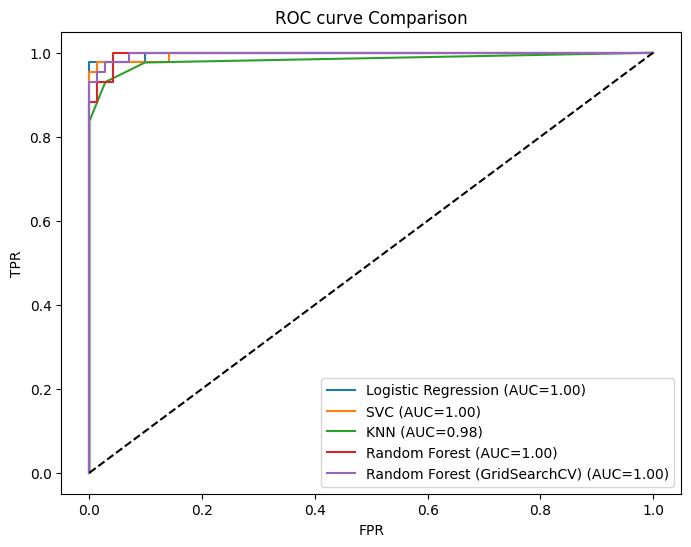

In [42]:
import warnings
warnings.filterwarnings("ignore")
#put your model in dictionary
models={

        'Logistic Regression': log_reg,
        'SVC': svc,
        'KNN': knn,
        'Random Forest': rf,
        'Random Forest (GridSearchCV)': rf_grid
}
plt.figure(figsize=(8,6))

for name,model in models.items():
    y_prob=model.predict_proba(x_test_scaled)[:,-1]  #probabiliy of class 1 
    fpr,tpr,_=roc_curve(y_test,y_prob)
    roc_auc=auc(fpr,tpr)
    plt.plot(fpr,tpr,label=f'{name} (AUC={roc_auc:.2f})')

#Random Line for chance 
plt.plot([0,1],[0,1],'k--')

plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve Comparison')
plt.legend()
plt.show()